In [1]:
import keras
import numpy as np

from keras.models import load_model
from keras.utils import to_categorical


# load trained model for visualization
cae = load_model('trained_cae.h5')

encoder = load_model('trained_encoder.h5')
decoder = load_model('trained_decoder.h5')


model = encoder


M = 128
L = 5
numepochs = 25


# One hot encoding
rawdata = np.zeros(M)
i = 0
while(i<M):
    rawdata[i] = i
    i += 1

data = to_categorical(rawdata)
#from numpy import reshape
data = data.astype(int)
ydata = np.reshape(data, (data.shape[0], 1, 1, data.shape[1]))
yvaldata = ydata
xdata = np.reshape(data, (data.shape[0], 1, 1, data.shape[1]))
xvaldata = xdata

print('done')

Using TensorFlow backend.


done


In [2]:
class_idx = ydata[0]
#indices = y_test[:, 0]
#indices = np.where(ydata[:, class_idx] == 1.)[0]
indices = ydata

idx = ydata[0]
#idx = indices[0]

#plt.imshow(idx[:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 1, 1, 128)         0         
_________________________________________________________________
dense_3 (Dense)              (None, 1, 1, 128)         16512     
_________________________________________________________________
dense_4 (Dense)              (None, 1, 1, 400)         51600     
_________________________________________________________________
batch_normalization_4 (Batch (None, 1, 1, 400)         1600      
_________________________________________________________________
reshape_2 (Reshape)          (None, 20, 20, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 128)       1280      
_________________________________________________________________
batch_normalization_5 (Batch (None, 20, 20, 128)       512       
__________

[[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]]
[[0.]]


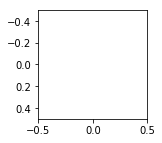

In [19]:
from vis.visualization import visualize_saliency
from vis.utils import utils
from keras import activations
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 2)

layer_idx = utils.find_layer_idx(model, 'conv2d_3')
print(inp)
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)
grads = visualize_saliency(model, layer_idx, filter_indices=None, seed_input=inp)
print(grads)
plt.imshow(grads, cmap='binary')

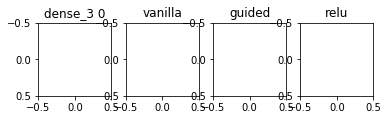

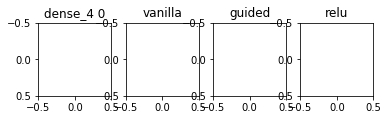

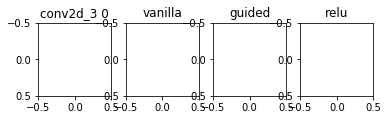

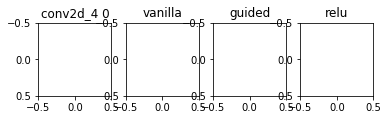

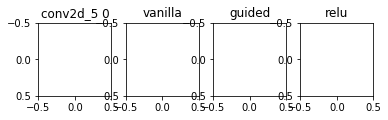

In [9]:
for index in np.arange(1):    
    for layer_idx in [1, 2, 5, 8, 11]:
        activations = xdata
        #print(activations[0])
        #print(activations[index])
        inp = activations[index]

        f, ax = plt.subplots(1, 4)
        # displays input
        
        ax[0].set_title(model.layers[layer_idx].name + ' ' + str(index))
        ax[0].imshow(inp[:, ..., 0], cmap='binary')

        for i, modifier in enumerate([None, 'guided', 'relu']):
            grads = visualize_saliency(model, layer_idx, filter_indices=None, 
                                       seed_input=inp, backprop_modifier=modifier)
            if modifier is None:
                modifier = 'vanilla'
            ax[i+1].set_title(modifier)    
            ax[i+1].imshow(grads, cmap='binary')